In [12]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import matthews_corrcoef, roc_auc_score
from sklearn.cross_validation import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
os.chdir('c:/data/bosh/python/')
oof = pd.read_csv("../subs/subs_blend_oob.csv")
oof.columns

('best_threshold :', 0.49495959595959599)
('mcc max : ', 0.83079473242405877)


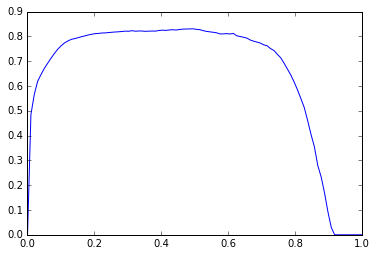

In [14]:
#oo = oo.loc[oo['DATE_S32max'].isnull() ]
oo = oof.loc[oof['DATE_S32max'].notnull() ]
# pick the best threshold out-of-fold
thresholds = np.linspace(0.001, 0.999, 100)
mcc = np.array([matthews_corrcoef(oo['Response'], oo['Prediction']>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
best_threshold = thresholds[mcc.argmax()]
print('best_threshold :',best_threshold)
print('mcc max : ',mcc.max())

('best_threshold :', 0.23285858585858585)
('mcc max : ', 0.35952940419104984)


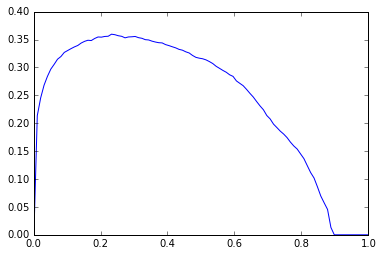

In [17]:
oo = oof.loc[oof['DATE_S32max'].isnull() ]
# pick the best threshold out-of-fold
thresholds = np.linspace(0.001, 0.999, 100)
mcc = np.array([matthews_corrcoef(oo['Response'], oo['Prediction']>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
best_threshold = thresholds[mcc.argmax()]
print('best_threshold :',best_threshold)
print('mcc max : ',mcc.max())